# Визуализация с seaborn

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации и форматирования данных с помощью seaborn. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков.

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

У всех графиков обязательно должен присутствовать заголовок и подписи осей, добавленные через объект класса Axes (кроме pairplot и FacetGrid, в этих графиках допустимо использовать стандартные подписи, генерируемые seaborn). Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` — порядковый номер записи в датасете.
* `Name` — наименование игры.
* `Platform` — платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и другие).
* `Year` — год выпуска игры.
* `Genre` — жанр игры.
* `Publisher` — наименование компании-издателя игры.
* `NA_Sales` — объём продаж игры в Северной Америке, млн копий.
* `EU_Sales` — объём продаж игры в Европе, млн копий.
* `JP_Sales` — объём продаж игры в Японии, млн копий.
* `Other_Sales` — объём продаж игры в остальных странах, млн копий.
* `Global_Sales` — объём продаж игры по всему миру, млн копий.

### Критерии оценки

**Зачёт** — выполнены задачи 1-7, каждый график отформатирован и читаем.

**На доработку** — выполнены не все обязательные задачи или какой-то из графиков не читаем/не подписан.

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### Загрузка данных

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объёма продаж всех игр жанра «Sports» в Японии. Задайте графику размер 12 на 6.

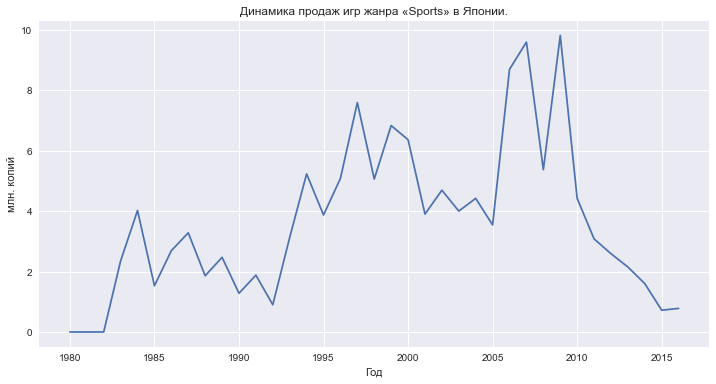

In [3]:
data = df[df['Genre'] == 'Sports'].groupby('Year').agg('sum')[['JP_Sales']]

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=data, ax=ax)

ax.set_title('Динамика продаж игр жанра «Sports» в Японии.')
ax.set_xlabel('Год')
ax.set_ylabel('млн. копий')
ax.legend([],[], frameon=False)

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

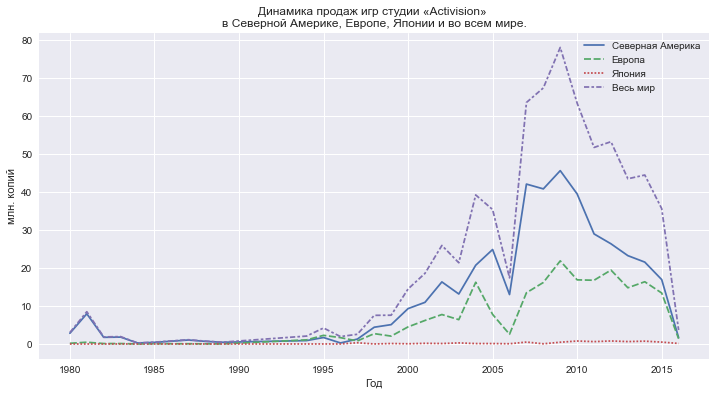

In [4]:
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
data
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=data, ax=ax)

ax.set_title('Динамика продаж игр студии «Activision» \nв Северной Америке, Европе, Японии и во всем мире.')
ax.set_xlabel('Год')
ax.set_ylabel('млн. копий')
ax.legend(['Северная Америка', 'Европа', 'Япония', 'Весь мир'])
plt.show()

### Комментарий для преподавателя:

В этом задании допустимо вместо прохода циклом использовать `pd.melt()`

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

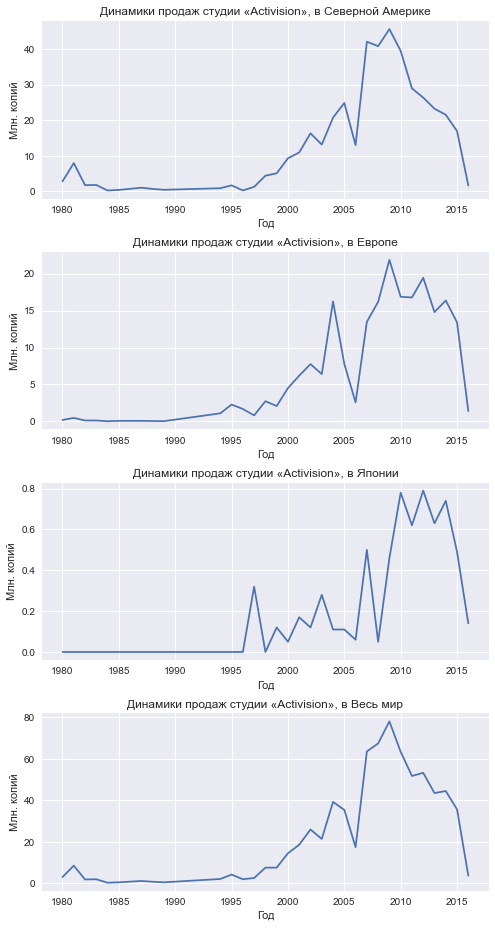

In [5]:
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
columns = [('NA_Sales', 'Северной Америке'), ('EU_Sales', 'Европе'), ('JP_Sales', 'Японии'), 
           ('Global_Sales', 'Весь мир')]

fig, axes = plt.subplots(figsize=(8, 16), nrows=len(columns))

for ax, column in zip(axes, columns):
    sns.lineplot(data=data[[column[0]]], ax=ax)
    
    ax.set_title(f'Динамики продаж студии «Activision», в {column[1]}')
    ax.set_xlabel('Год')
    ax.set_ylabel('Млн. копий')
    ax.legend([],[], frameon=False)
    
fig.subplots_adjust(hspace=.3)

plt.show()

### Задача 4

Постройте PairPlot для всех численных признаков датасета. Разным цветом укажите цвета для разных платформ.

Примечание: при построении этого графика pandas может выдавать предупреждения (warnings), в этой задаче такое поведение допустимо.

/Users/voychenkonikita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/voychenkonikita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/voychenkonikita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/voychenkonikita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/voychenkonikita/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/voychenkonikita/opt/anaconda

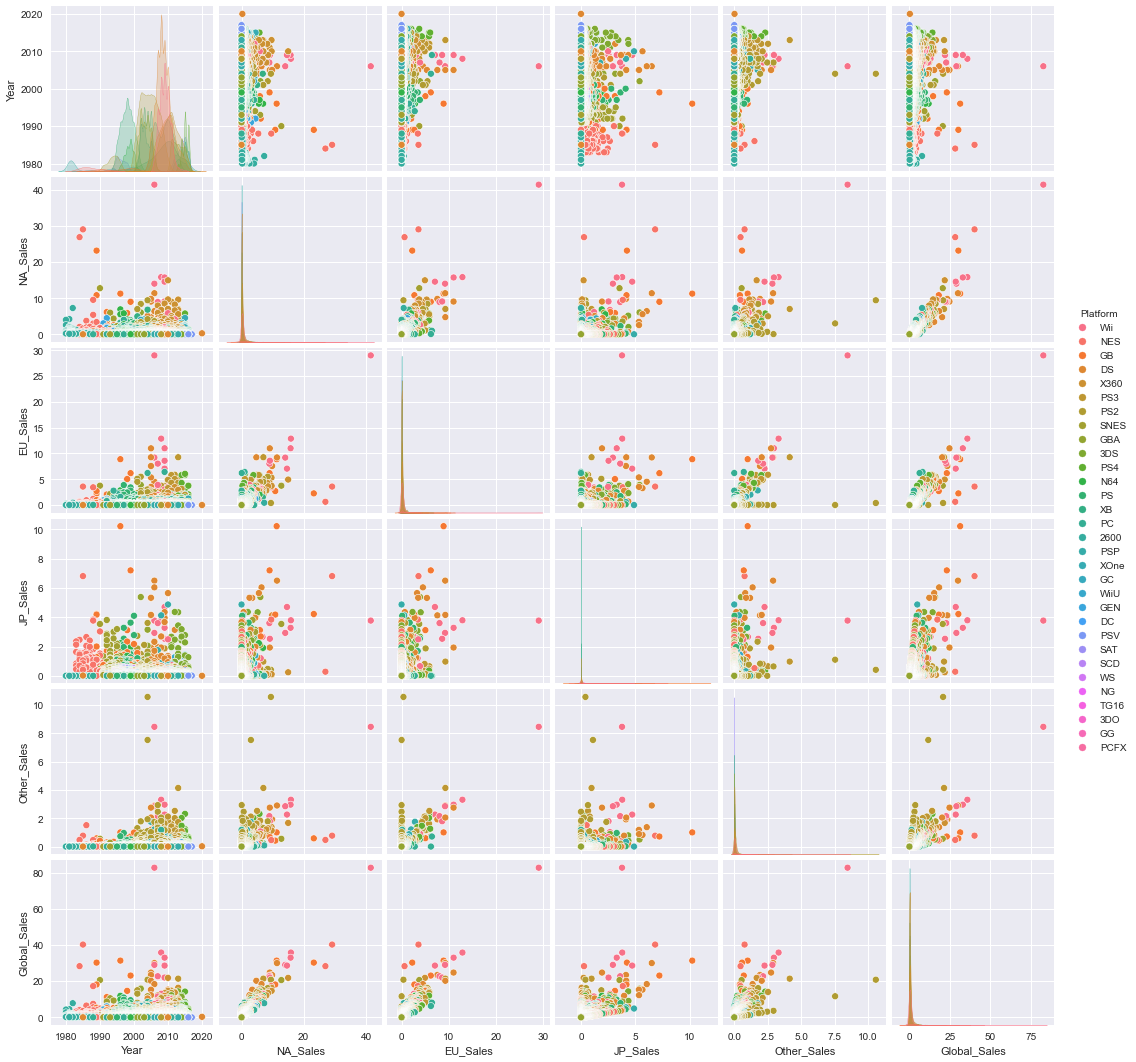

In [6]:
data = df.drop('Rank', axis=1)
sns.pairplot(data, hue='Platform')

### Задача 5

В одной координатной сетке постройте 2 гистограммы распредения мировых продаж игр издателей «Microsoft Game Studios» и «Take-Two Interactive» после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков.

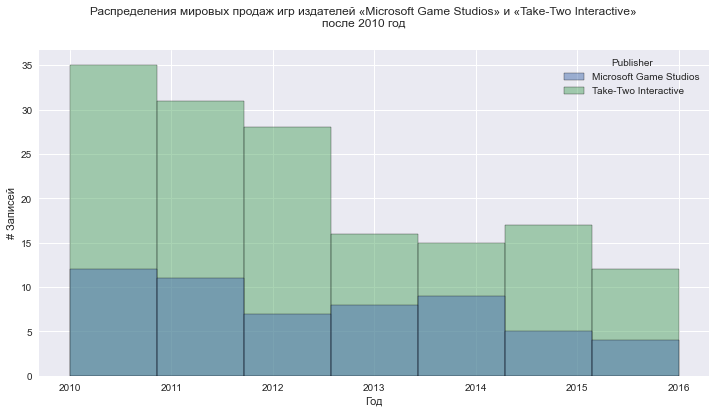

In [7]:
data = df[(df['Year'] >= 2010) & (df['Publisher'].isin(['Microsoft Game Studios', 'Take-Two Interactive']))]


fig, ax = plt.subplots(figsize=(12,6), sharex=True)

fig.suptitle('Распределения мировых продаж игр издателей «Microsoft Game Studios» и «Take-Two Interactive»'\
             '\nпосле 2010 год')

sns.histplot(data=data, x='Year', hue='Publisher', ax=ax, alpha=0.5, bins=len(np.unique(data['Year'])))

ax.set_title(f'')
ax.set_xlabel('Год')
ax.set_ylabel('# Записей')

plt.show()

### Задача 6

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зелёного полупрозрачного прямоугольника.

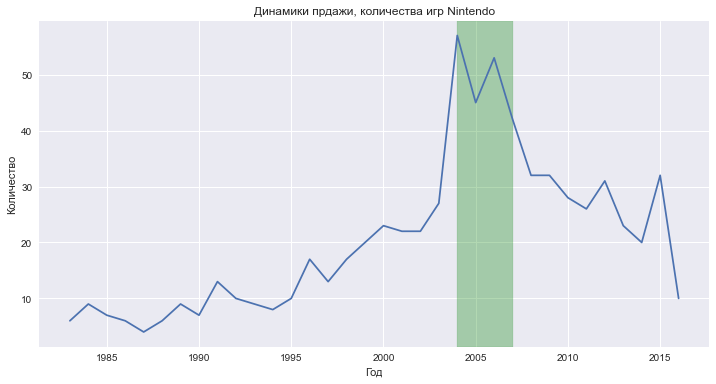

In [8]:
data = df[df['Publisher'] == 'Nintendo'].groupby('Year').agg('count')[['Name']]

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(data=data, ax=ax)

ax.axvspan(xmin=int(data[data['Name'] > 35].idxmin()), 
           xmax=int(data[data['Name'] > 35].idxmax()),
           color='green', alpha=0.3)

ax.set_title('Динамики прдажи, количества игр Nintendo')
ax.set_xlabel('Год')
ax.set_ylabel('Количество')
ax.legend([],[], frameon=False)

### Задача 7

Определите 3 жанра и 4 платформы с самыми большими продажами игр в мире за всё время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанра, платформы). Разными цветами укажите игры разных годов. Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны.

Делайте графики достаточно читаемыми, чтобы из них можно было сделать вывод о наличии / отсутствии зависимостей в данных.

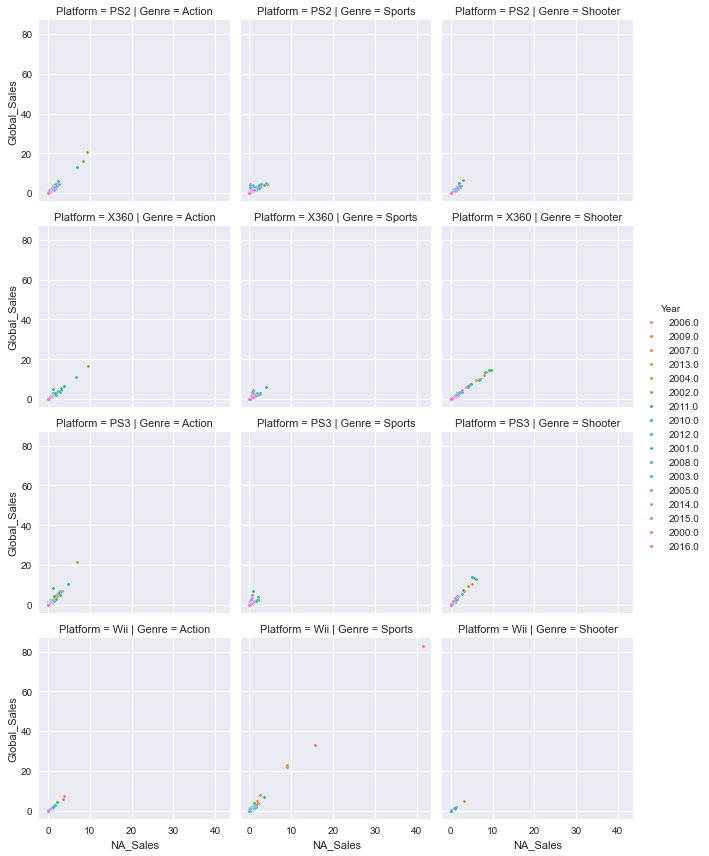

In [11]:
genre = df.groupby(['Genre']).agg('sum').sort_values('Global_Sales', ascending=False).head(3).index
platform = df.groupby(['Platform']).agg('sum')[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(4).index
year = pd.unique(df[(df['Genre'].isin(genre)) & (df['Platform'].isin(platform))]['Year'].dropna())

g = sns.FacetGrid(df, row='Platform', col='Genre', hue='Year', 
                  row_order=list(platform), 
                  col_order=list(genre), 
                  hue_order=list(year))
g.map(sns.scatterplot, 'NA_Sales', 'Global_Sales', s=10)

g.add_legend()